У цьому домашньому завданні ми продовжуємо працювати з набором даних `Yulu`, з яким почали працювати в "hw 4.3. Робота з DataFrame. Діаграма розсіювання.". Фокус цього ДЗ в тому, аби будувати візуалізації використовуючи методи бібліотеки `seaborn`. Це дозволяє будувати гарніні візуалізації, а іноді також робити це швидше, ніж з `matplotlib`.

Документація до тої частини бібліотеки, з якою тут працюємо

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів

0. Імпортуйте бібліотеки `matplotlib.pyplot`, `seaborn` та `pandas`.  Завантажте дані з файла `yulu_rental.csv` у `pandas.DataFrame` `df`.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv('../data/yulu_rental.csv')

1. Користуючись методом `seaborn.jointplot` побудуйте візуалізацію графіка розсіювання між змінними `humidity` та `count`, зазначивши колір точки в відповідності до значення змінної `weather`. Опишіть свої спостереження з графіку. Що бачите цікавого і корисного для прийняття рішень на основі цих даних?

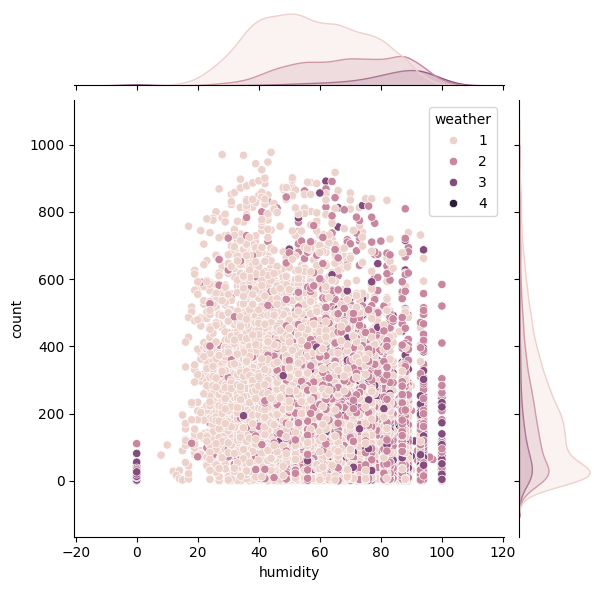

In [3]:
sns.jointplot(data=df, x="humidity", y="count", hue="weather");

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=16BksRhZzoz4ynPKCPjXEek56XBsAEF6T)


    Спостереження:
    
- основна кількість оренд відбувається при вологості 40-80%. Що є природнім, оскільки  цей діапазон вологосі часто притаманний хорошій погоді.
  
- вплив погоди на кількість оренд:
  - погода 1 (ясно, мало хмарно, частково хмарно). Найбільша кількість оренди припадає на хорошу бездощову погоду. Це повністю передбачувано і логічно.
  - погода 2 (туман, хмарно). Кількість оренд за такої погоди у 2,5 рази менша. Найбільше оренд при вологості 60-80%, це може свідчити, що за таких умов все ще комфортно користуватись велосипедом.
  - погода 3 (легкий дощ, легкий сніг). Кількість оренд нижча у 8,4% рази у порівнянні із орендою за погоди 1. Це дуже суттєве зниження і закономірне, адже люди надають перевагу більш комфортним способам пересування аніж велосипед.
  - погода 4 (сильний дощ, сніг, гроза). Там одна оренда. мабуть то була повна безвихідь у людини, бідолаха((( Очевидно, що ніхто не захоже кататися чи користуватися велосипедом у таку погоду.
    
- щільність розподілу нам вказує, що найбільше велосипедів беруть при вологості 40-60%, це вказує на найбільш комфортні погодні умови для велосипедистів. Кількість оренд зменшується як при низькій вологості так і при високій.


    Висновки:

- оренда велосипедів найбільш активна в хорошу погоду (ясно, частково хмарно) і при середньому рівні вологості. Це означає, що за такої погоди можна очікувати підвищеного попиту на велосипеди.

- погані погодні умови значно зменшують (або майже обнуляють, як при погоді 4) кількість оренд. Можна це враховувати при плануванні роботи.

- відповідно до прогнозу погоди можна передбачити зростання або падіння попиту.

    Користь:

Можна використовувати ці дані для прогнозування попиту. Це дозволить, наприклад,  ефективніше планувати розподіл велосипедів по пунктах оренди, а ще оптимізувати технічне обслуговування в залежності від погодних умов.

2. Відфільтруйте і збережіть в окремій змінній лише дані з сезоно "весна" і "літо" (звернітся до опису даних вгорі ноутбуку, аби зрозуміти, які значення вам треба обрати.
Користуючись методом `seaborn.jointplot` побудуйте візуалізацію графіка розсіювання між змінними `casual` та `registered`, зазначивши колір точки в відповідності до значення змінної `season`. Встановіть прозорість на 0.2.

Опишіть свої спостереження з графіку. Що бачите цікавого і корисного для прийняття рішень на основі цих даних?

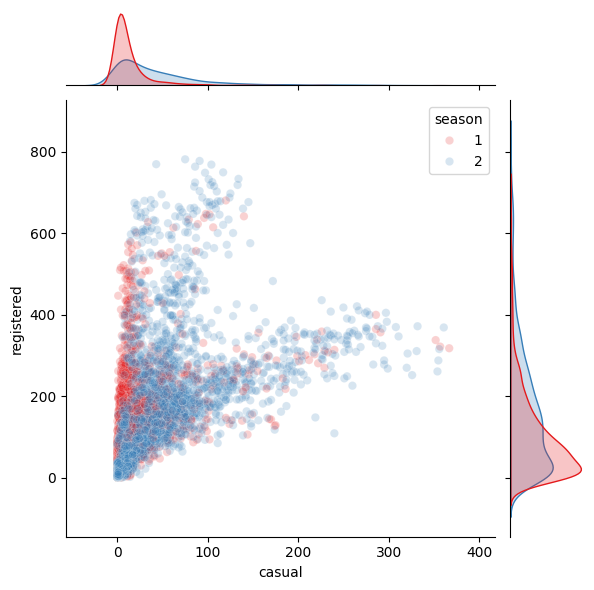

In [26]:
season = df[(df.season==1) | (df.season==2)]
sns.jointplot(data=season, x="casual", y="registered", hue='season', alpha = 0.2, palette='Set1');
# я і тут намагалась змінити підписи, але в легенді. щоб були весна і літо. і наче спрацювало, але постійно був Warning,
# що я якось криво то зробила. Тому залишила як є

    спостереження:

- з графіку видно, що навіть при мінімальних орендах від casual, багато зареєстрованих користувачів продовжують брати велосипеди.Особливо це стосується весни (червоні точки вздовж У)
  
- влітку (сині точки) більше оренд з’являється серед casual користувачі (наприклад, туристи, які активно користуються велосипедами).

    висновки:

- весна: більше зареєстрованих користувачів, менш випадкових. постійні клієнти активніші.

- літо: більше casual користувачів, що може означати приплив туристів або людей, які користуються велосипедами сезонно.

Цікаво і логічно щодо користування велосипедами. Можна думати в сторону програми лояльності навесні для зареєстрованих, щоб заохотити відкривати сезон так би мовити. Чи активно вести кампанію, орієнтуючить на туристів та випадкових користувачів влітку.

3. Для дослідження як розподілу значень  `humidity` в залежності від погоди (`weather`) побудуйте візуалізацію типу "ящик з вусами" (box plot)користуючись відповідним методом бібліотеки seaborn:

https://seaborn.pydata.org/generated/seaborn.boxplot.html


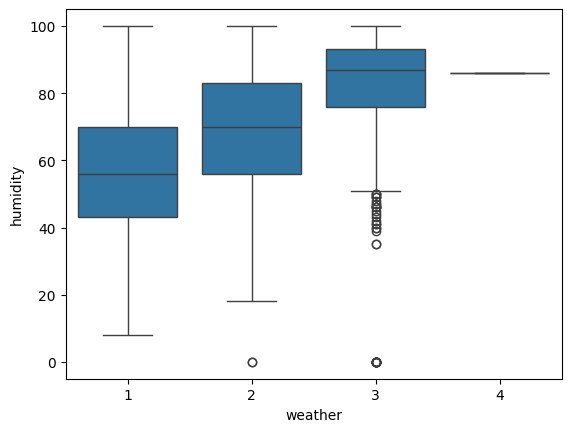

In [29]:
sns.boxplot(df, x='weather', y='humidity');

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1_6CBacvDlbuV1XD9GNoGn9sJOSfr74pS)


4. Використайте бібліотеку Seaborn для створення **парних графіків** (pairplot) розсіювання, які показуватимуть взаємозв'язки між кількістю зареєстрованих, неформальних користувачів та загальною кількістю велосипедів, взятих на прокат. Кожен графік повинен розрізняти робочі та святкові дні за кольором.

Для побудови цієї візуалізації спочатку відфільтруйте потрібні колонки в даних і потім зробіть візуалізацію.

Проаналізуйте візуалізацію і скажіть, чи можна виявити особливу поведінку користувачів у святкові дні з цих графіків?

<Figure size 500x500 with 0 Axes>

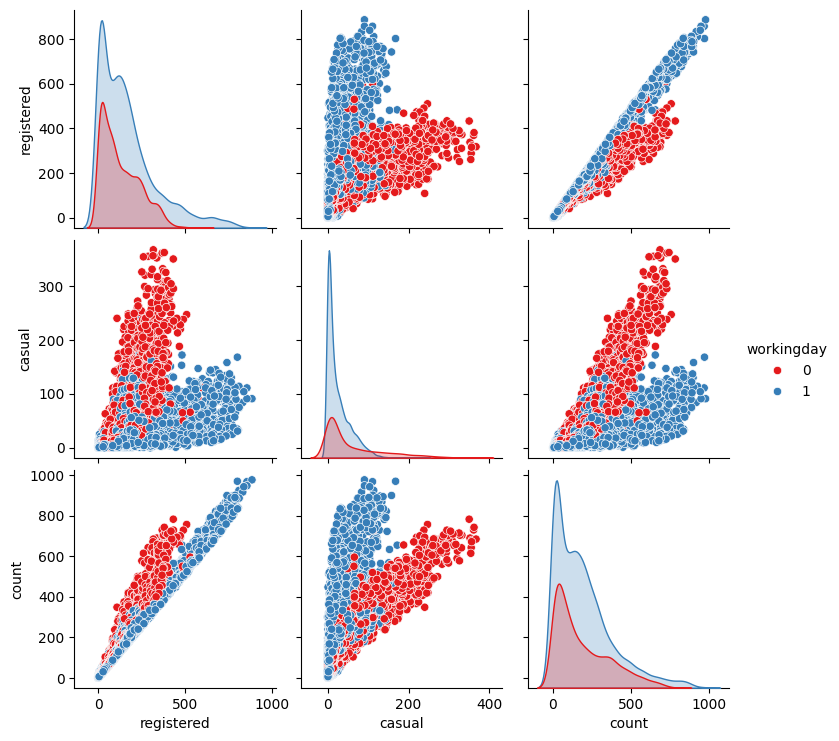

In [35]:
sort_df = df[['registered', 'casual', 'count', 'workingday']]
plt.figure(figsize=(5,5))
sns.pairplot(data=sort_df, hue="workingday", palette='Set1');

    Гістограма count показує:
    
    - синя (робочі дні) має пік біля нуля, що свідчить про велику кількість днів з малою кількістю оренд. Але вона розтягнута по осі осі Х, що означає дні з високою кількістю оренд є, хоч і не так часто.
    - червона (вихідні дні): менший пік біля нуля одначає менше дняв із малою кількістю оренд, а те, що гістограма коротша за віссю Х - оренди у вихідні дні не досянають таких високих значень, як у будні.
    Загалом кількість оренд в будні дні перевищує оренди вихідних (свядкових).

    Діаграма розсіювання registered / count:

    - чітка лінійна залежність між кількістю зареєстрованих користувачів і загальною кількістю оренд.
    - тобто, більша кількість зареєстрованих користувачів призводить до збільшення загальної кількості оренд як в робочі, так і в неробочі дні.

    Діаграма розсіювання casual / count:

    - синя хмара точок вздовж осі count y вказує на те, що неформальні користувачі мало активні в будні дні. І загалом не впливають суттєво на count
    - тоді як червона хмара точок по діагоналі говорить про те, що у вихідні дні кількість неформальних користувачів збільшується, і разом з цим збільшується й загальна кількість оренд.

    Висновки:
    - в робочі дні велосипеди здебільшого використовують зареєстровані користувачі, й загальна кількість оренд більше залежить від них. Неформальні користувачі малоактивні в будні.
    - в неробочі дні кількість оренд більше залежить від неформальних користувачів, оскільки вони частіше використовують велосипеди для розваг або відпочинку, тоді як зареєстровані користувачі у вихідні орендують менше.
    - загальна кількість оренд залежить як від зареєстрованих, так і від неформальних користувачів, проте зареєстровані користувачі вносять більш передбачуваний внесок в загальну кількість.

    менш офіційно))) ця поведінка досить зрозуміла, адже якщо ти весь робочий тиждень катався на роботу-з роботи на велосипеді, то менш схильний думати, що прогулянка на велосипеді у вихідний день - ʼце ваууу ,яка розвагаʼ. В той самий час незареєстровані користувачі такі активні у вихідні, бо  користувалися іншими транспортними варіантами , а прогулянка велосипедом дня асоційована із активним відпочинком вихідного дня.

    

    

5. Змініть тип даних колонки `datetime` на `pandas.datetime`.

In [39]:
df['datetime'] = pd.to_datetime(df.datetime)

 Тепер давайте візуалізуємо кількість зареєстрованих та казуальних користувачів поденно. Для цього виконайте код нижче і після цього створіть нову змінну `df_viz` яка містить лише колонки `'date', 'registered', 'casual'`, згрупуйте дані за датою і відобразіть на **одному** графіку поденну динаміку двох показників з допомогою `pandas.plot`.

In [40]:
df['date'] = df.datetime.dt.date

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1XGBqmFLXiI_v-MBEOiCQNyW6sUpvII1n)


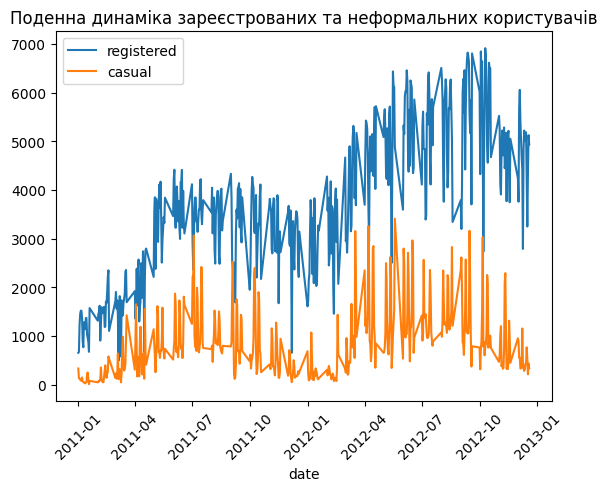

In [54]:
df_viz = df[['date', 'registered', 'casual']]
df_viz_grouped = df_viz.groupby('date').sum().reset_index()

df_viz_grouped.plot(x='date', y=['registered', 'casual'], kind='line', title='Поденна динаміка зареєстрованих та неформальних користувачів')
plt.xticks(rotation=45)
plt.title('Поденна динаміка зареєстрованих та неформальних користувачів');